In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

with open('data6.txt', 'r') as file:
    data = file.readlines()

features = [[] for _ in range(13)]
target = []

for line in data:
    values = line.strip().split()
    for i in range(13):
        features[i].append(float(values[i]))
    target.append(float(values[13]))

In [20]:
X = np.array(features).T  # Transpose to have (number of samples, number of features)

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=42)

covariance_values = [np.cov(X_train[:, i], Y_train)[0, 1] for i in range(13)]

correlation_values = [np.corrcoef(X_train[:, i], Y_train)[0, 1] for i in range(13)]

for i in range(13):
    print(f"Covariance between X{i+1} and Y: {covariance_values[i]}")
    print(f"Correlation between X{i+1} and Y: {correlation_values[i]}")


Covariance between X1 and Y: -23.761810661223848
Correlation between X1 and Y: -0.02637203435573481
Covariance between X2 and Y: -206.475140060443
Correlation between X2 and Y: -0.22670495934063165
Covariance between X3 and Y: 8.745730824668746
Correlation between X3 and Y: 0.009036164426958872
Covariance between X4 and Y: 64.29426380094147
Correlation between X4 and Y: 0.07035635508233358
Covariance between X5 and Y: -847.3709002680475
Correlation between X5 and Y: -0.8816942663525046
Covariance between X6 and Y: 428.9789474866371
Correlation between X6 and Y: 0.468859269427826
Covariance between X7 and Y: -210.97659522012881
Correlation between X7 and Y: -0.22965773891364907
Covariance between X8 and Y: -852.1731999236927
Correlation between X8 and Y: -0.8899528711009173
Covariance between X9 and Y: 65.27744862703452
Correlation between X9 and Y: 0.07187931379711615
Covariance between X10 and Y: 37.89470103491982
Correlation between X10 and Y: 0.03948151258704567
Covariance between X

In [36]:
import pandas as pd

data = {
    "Feature": [f"X{i + 1}" for i in range(13)],
    "Covariance": covariance_values,
    "Correlation": correlation_values
}

df = pd.DataFrame(data)

print(df)

   Feature  Covariance  Correlation
0       X1  -23.761811    -0.026372
1       X2 -206.475140    -0.226705
2       X3    8.745731     0.009036
3       X4   64.294264     0.070356
4       X5 -847.370900    -0.881694
5       X6  428.978947     0.468859
6       X7 -210.976595    -0.229658
7       X8 -852.173200    -0.889953
8       X9   65.277449     0.071879
9      X10   37.894701     0.039482
10     X11   10.060255     0.010388
11     X12  429.815625     0.474887
12     X13  -33.200497    -0.037314


In [39]:
std_deviation_features = [np.std(X_train[:, i], ddof=1) for i in range(13)]

std_deviation_target = np.std(Y_train, ddof=1)

values = [covariance_values[i] / (std_deviation_features[i] * std_deviation_target) for i in range(13)]

for i in range(13):
    print(f"Absolute value of correlation for X{i+1}: {values[i]}")


Absolute value of correlation for X1: -0.026372034355734802
Absolute value of correlation for X2: -0.22670495934063173
Absolute value of correlation for X3: 0.009036164426958874
Absolute value of correlation for X4: 0.0703563550823336
Absolute value of correlation for X5: -0.8816942663525047
Absolute value of correlation for X6: 0.468859269427826
Absolute value of correlation for X7: -0.22965773891364916
Absolute value of correlation for X8: -0.8899528711009178
Absolute value of correlation for X9: 0.0718793137971162
Absolute value of correlation for X10: 0.03948151258704568
Absolute value of correlation for X11: 0.010387508553636574
Absolute value of correlation for X12: 0.4748869309211453
Absolute value of correlation for X13: -0.03731429004860928


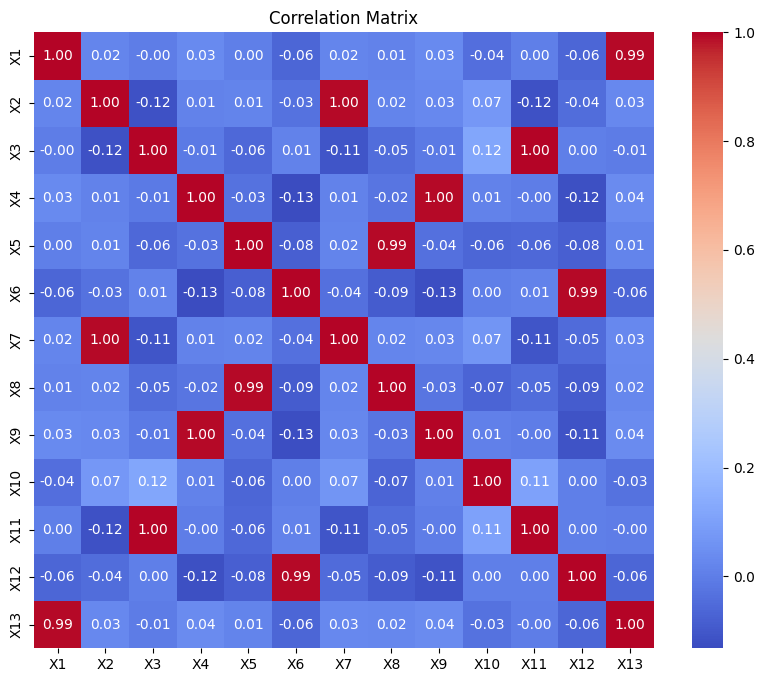

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = np.corrcoef(X_train.T)

plt.figure(figsize=(10, 8))
tick_labels = [f"X{i + 1}" for i in range(13)]
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Correlation Matrix")
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

beta0 = model.intercept_
beta_i = model.coef_

data = {
    "Coefficient": ["Intercept (β0)"] + [f"β{i + 1}" for i in range(len(beta_i))],
    "Value": [beta0] + list(beta_i)
}

df = pd.DataFrame(data)
print(df)

       Coefficient      Value
0   Intercept (β0)  10.004410
1               β1  -0.001114
2               β2  -1.988800
3               β3  -0.489891
4               β4   0.996980
5               β5   0.022266
6               β6  -0.006333
7               β7  -0.010986
8               β8  -8.022144
9               β9   0.002322
10             β10   0.002209
11             β11  -0.011592
12             β12   4.002637
13             β13   0.100099


In [26]:
from sklearn.metrics import mean_squared_error

predicted_Y = model.predict(X_train)

mse = mean_squared_error(Y_train, predicted_Y)

estimated_variance_of_noise = mse

print("Estimated Variance of Noise (σ²) using MSE:", estimated_variance_of_noise)


Estimated Variance of Noise (σ²) using MSE: 0.04478321589857145


In [52]:
from numpy.linalg import inv

coefficients = model.coef_

residuals = Y_train - model.predict(X_train)

n = len(Y_train)
p = len(coefficients)

rss = np.sum(residuals ** 2)
mse = rss / (n - p - 1)
se = np.sqrt(mse)

X_transpose_X = np.dot(X_train.T, X_train)
X_transpose_X_inv = inv(X_transpose_X)
t_values = coefficients / (se * np.sqrt(np.diag(X_transpose_X_inv)))

data = {
    "Predictor": [f"X{i + 1}" for i in range(p)],
    "T-Value": t_values
}
df = pd.DataFrame(data)
print(df)


   Predictor     T-Value
0         X1   -0.078966
1         X2 -127.837930
2         X3  -32.395114
3         X4   64.040295
4         X5    1.595471
5         X6   -0.438649
6         X7   -0.713217
7         X8 -572.671821
8         X9    0.148339
9        X10    1.545807
10       X11   -0.767909
11       X12  274.621243
12       X13    7.010298


In [54]:
alpha = 2

selected_features = []

for i in range(len(t_values)):
    if abs(t_values[i]) > alpha:
        selected_features.append(f"X{i + 1}")

print("Relevant features based on t-values and alpha:", selected_features)

Relevant features based on t-values and alpha: ['X2', 'X3', 'X4', 'X8', 'X12', 'X13']


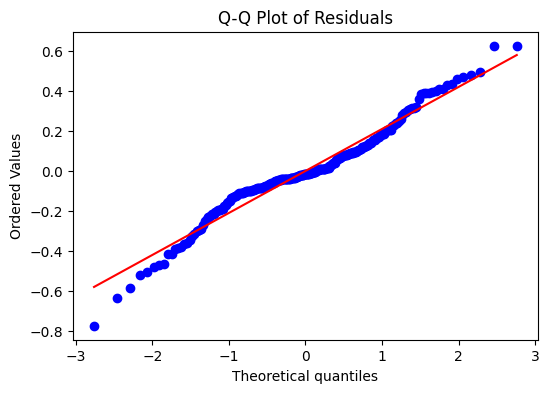

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

predicted_Y = model.predict()

residuals = Y_train - predicted_Y

fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

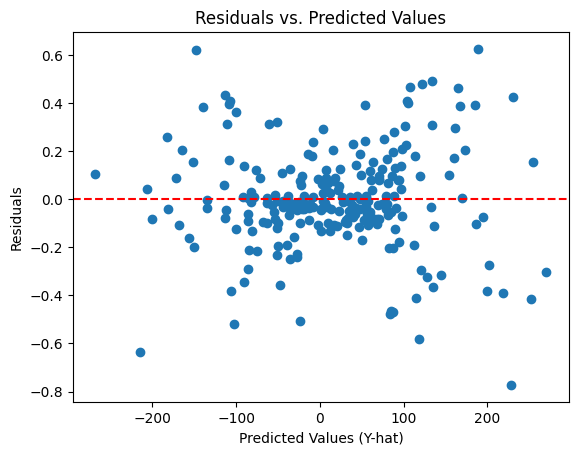

In [34]:

plt.scatter(predicted_Y, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Y-hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


In [35]:
r_squared = model.rsquared

print("R-squared:", r_squared)

R-squared: 0.9999950058781983
